### Chapter 1. 데이터 전처리

1. 데이터 불러오기
2. 데이터 타입 확인
3. 데이터 결측치 확인 (데이터 정제 I)
4. 데이터 결측치 대체 (데이터 정제 II)
5. 데이터 합치기
6. 데이터 인덱싱
7. 이탈 데이터 전처리 : 일별 데이터 -> 월별 데이터

In [1]:
import pandas as pd
import numpy as np

import os

### 경로 관련

In [2]:
# 현재 프로세스의 작업 디렉토리 확인
cur_dir = os.getcwd()
print("cur_dir : ", cur_dir, "\n")

# 현재 작업파일의 경로에 있는 리스트 확인 -> 리스트로 반환
dir_list = os.listdir(cur_dir)
print("dir_list : ", dir_list, "\n")

# 특정 경로의 폴더(디렉토리) 생성
os.mkdir(cur_dir + "/dataset")

cur_dir :  /Users/gimda-eun/eodngk 

dir_list :  ['.DS_Store', 'dataset', 'chapter 1. 데이터 전처리-샘플 데이터.ipynb', '.ipynb_checkpoints'] 



FileExistsError: [Errno 17] File exists: '/Users/gimda-eun/eodngk/dataset'

### 특정 경로의 파일 리스트 확인

In [3]:
data_list = os.listdir(cur_dir + "/dataset/dropout")
print("데이터셋 목록(data_list) : ", data_list)

데이터셋 목록(data_list) :  ['Dropout.csv', 'df4.csv', 'df1.csv', 'df3.csv', 'df2.csv', 'member.csv']


### 데이터 불러오기 type 1 -> dict 형태로 반환

In [4]:
Dataset = dict()

for data in data_list:
    print(data)
    Dataset[data[0:-4]] = pd.read_csv(cur_dir + f"/dataset/dropout/{data}", index_col = 0)

Dropout.csv
df4.csv
df1.csv
df3.csv
df2.csv
member.csv


### 데이터 불러오기 type 2 -> dataframe 형태로 각각 반환

In [5]:
member = pd.read_csv(cur_dir + '/dataset/dropout/member.csv', index_col = 0).reset_index()
df1 = pd.read_csv(cur_dir + '/dataset/dropout/df1.csv', index_col = 0).reset_index()
df2 = pd.read_csv(cur_dir + '/dataset/dropout/df2.csv', index_col = 0).reset_index()
df3 = pd.read_csv(cur_dir + '/dataset/dropout/df3.csv', index_col = 0).reset_index()
df4 = pd.read_csv(cur_dir + '/dataset/dropout/df4.csv', index_col = 0).reset_index()

### 데이터 합치기

In [6]:
dropout = pd.merge(member, df1, how = 'left', left_on = ['ID'], right_on = ['ID'])
dropout = pd.merge(dropout, df2, how = 'left', left_on = ['ID'], right_on = ['ID'])
dropout = pd.merge(dropout, df3, how = 'left', left_on = ['ID'], right_on = ['ID'])
dropout = pd.merge(dropout, df4, how = 'left', left_on = ['ID'], right_on = ['ID'])

### 테이블 컬럼 타입 확인

In [7]:
dropout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   object 
 1   Nacionality                                     4397 non-null   object 
 2   Gender                                          4397 non-null   object 
 3   Target                                          4416 non-null   object 
 4   Marital status                                  4405 non-null   float64
 5   Application mode                                4399 non-null   float64
 6   Application order                               4395 non-null   float64
 7   Course                                          4403 non-null   float64
 8   Daytime/evening attendance                      4407 non-null   float64
 9   Previous qualification                   

### 데이터프레임 내의 값 변경

In [8]:
def change_value(values):
    if values == 'Portuguese':
        return 1
    elif values == 'German':
        return 2
    elif values == 'Spanish':
        return 3
    elif values == 'Italian':
        return 4
    elif values == 'Dutch':
        return 5
    elif values == 'English':
        return 6
    elif values == 'Lithuanian':
        return 7
    elif values == 'Angolan':
        return 8
    elif values == 'Cape Verdean':
        return 9
    elif values == 'Guinean':
        return 10
    elif values == 'Mozambican':
        return 11
    elif values == 'Santomean':
        return 12
    elif values == 'Turkish':
        return 13
    elif values == 'Brazilian':
        return 14
    elif values == 'Romanian':
        return 15
    elif values == 'Moldova':
        return 16
    elif values == 'Mexican':
        return 17
    elif values == 'Ukrainian':
        return 18
    elif values == 'Russian':
        return 19
    elif values == 'Cuban':
        return 20
    elif values == 'Colombian':
        return 21

### 데이터 값 변경 version 1 -> 함수/apply 사용

In [9]:
dropout['Nacionality'] = dropout['Nacionality'].apply(change_value)

### 데이터 컬럼 추가

#### - 빈 컬럼 생성 version 1
-> DataFrame['추가하고 싶은 컬럼명'] = '컬럼값'

In [10]:
dropout['Nationality'] = 0

#### - 빈 컬럼 생성 version 2
-> insert(loc = 넣고 싶은 새로운 컬럼의 위치, column = 추가하고 싶은 새로운 컬럼명, value = 새로운 컬럼의 값)

In [11]:
dropout.insert(loc = 2, column = 'Nationality', value = 0)

ValueError: cannot insert Nationality, already exists

### 데이터 값 변경 version 2 -> loc 사용

In [12]:
dropout.loc[dropout['Nacionality'] == 'Portuguese', 'Nationality'] = 1

### 컬럼별 중복 제거 개수

In [13]:
columns_info = dict()
columns = dropout.columns
for col in columns:
    columns_info[col] = len(dropout[col].unique())
    
columns_info

{'ID': 4424,
 'Nacionality': 22,
 'Gender': 3,
 'Target': 4,
 'Marital status': 7,
 'Application mode': 19,
 'Application order': 9,
 'Course': 18,
 'Daytime/evening attendance': 3,
 'Previous qualification': 18,
 "Mother's qualification": 30,
 "Father's qualification": 35,
 "Mother's occupation": 33,
 "Father's occupation": 47,
 'Displaced': 3,
 'Educational special needs': 3,
 'Debtor': 3,
 'Tuition fees up to date': 3,
 'Scholarship holder': 3,
 'Age at enrollment': 47,
 'International': 3,
 'Education': 26,
 'Curricular units 1st sem (credited)': 22,
 'Curricular units 1st sem (enrolled)': 24,
 'Curricular units 1st sem (evaluations)': 36,
 'Curricular units 1st sem (approved)': 24,
 'Curricular units 1st sem (grade)': 790,
 'Curricular units 1st sem (without evaluations)': 12,
 'Curricular units 2nd sem (credited)': 20,
 'Curricular units 2nd sem (enrolled)': 23,
 'Curricular units 2nd sem (evaluations)': 31,
 'Curricular units 2nd sem (approved)': 21,
 'Curricular units 2nd sem (

### 데이터 컬럼 탐색

In [14]:
dropout = dropout.rename(columns = {'Nacionality' : 'Nationality'})
dropout_ation_cnt = dropout.groupby(['Nationality', 'Target']).size().reset_index().pivot(columns='Target', index='Nationality', values=0)
dropout_ation_cnt = dropout_ation_cnt.rename(index={1:'Portuguese', 2:'German', 3:'Spanish', 4:'Italian', 5:'Dutch', 6:'English', 7:'Lithuanian', 8:'Angolan', 9:'Cape Verdean', 10:'Guinean', 11:'Mozambican', 12:'Santomean', 13:'Turkish', 14:'Brazilian', 15:'Romanian', 16:'Moldova', 17:'Mexican', 18:'Ukrainian', 19:'Russian', 20:'Cuban', 21:'Colombian'})
dropout_ation_cnt

ValueError: Grouper for 'Nationality' not 1-dimensional

### 결측치 확인
- 컬럼별 결측 비율 확인

In [15]:
null_cnt_df = pd.DataFrame(dropout.isnull().sum()).rename(columns = {0:'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round(null_cnt_df['null_count']/len(dropout) * 100, 2)
null_cnt_df

,index,null_count,null_ratio
0,ID,0,0.00
1,Nationality,27,0.61
2,Gender,27,0.61
3,Target,8,0.18
4,Marital status,19,0.43
5,Application mode,25,0.57
6,Application order,29,0.66
7,Course,21,0.47
8,Daytime/evening attendance,17,0.38
9,Previous qualification,21,0.47


# ------------------------------------------------------------------------------------------------------------

## 결측치 처리

###  머신러닝 및 데이터 분석에서 상황과 목적에 맞게 처리해야 하는 중요한 프로세스 중 하나



1. 결측치 비율이 10% 미만인 경우
- 삭제 가능
<p>


2. 결측치 비율이 30% ~ 50%인 경우
- 삭제 위험
<p>


3. 결측치 비율이 50% 이상인 경우
- 데이터 자체에 대한 추가 검증 필요 or 해당 컬럼의 제거 고려
<p> 
    
==============================
### * 결측치를 처리하는 방법은 다양
    
1. 제거
- 한개 이상의 결측치가 있는 모든 행 제거
    
2. 대체
- 결측치를 특정값(평균, 최소, 최대, 최반값 등등)으로 대체
    
3. 보간법
- 추세를 결측치 이외의 값들을 선형적으로 같은 간격으로 처리 (시계열 데이터에 적합)

#### Target 변수에 결측치가 있는 행 일괄 제거
- target 변수에는 결측치가 있어서는 안된다!!!

In [16]:
# target 변수의 결측치 유무 확인
dropout[dropout['Target'].isnull() == True]

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Nationality
250,5fc1c1cb-6ac2-43c9-9a51-7f99922463d4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
472,7e6e6287-813f-4404-b43e-59d73c2c6de8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
652,9c66f9e2-edfc-452c-b08f-94d0120f5df3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1443,1a235c75-5166-4cf5-b495-50f92479e73f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2292,9d74b27a-7e6e-4a1a-a420-6ebab9b5e064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3150,1ef15756-3d7b-4919-9375-f84dfeb4668b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3413,46e9e673-a0a3-4864-8d8a-8653527f3e07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4414,e6d883fa-82e5-488a-a790-efc762757ae3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### 데이터 컬럼 타입 변경

In [17]:
dropout = dropout.astype({"Marital status" : 'object',
                         "Application mode" : 'object',
                         "Course" : 'object',
                         "Daytime/evening attendance" : 'object',
                         "Previous qualification" : 'object',
                         "Mother's qualification" : 'object',
                         "Father's qualification" : 'object',
                         "Mother's occupation" : 'object',
                         "Father's occupation" : 'object',
                         "Displaced" : 'object',
                         "Educational special needs" : 'object',
                         "Debtor" : 'object',
                         "Tuition fees up to date" : 'object',
                         "Scholarship holder" : 'object',
                         "International" : 'object'})
dropout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ID                                              4424 non-null   object 
 1   Nationality                                     4397 non-null   float64
 2   Gender                                          4397 non-null   object 
 3   Target                                          4416 non-null   object 
 4   Marital status                                  4405 non-null   object 
 5   Application mode                                4399 non-null   object 
 6   Application order                               4395 non-null   float64
 7   Course                                          4403 non-null   object 
 8   Daytime/evening attendance                      4407 non-null   object 
 9   Previous qualification                   

In [18]:
# target 변수에 결측이 있는 row 제거
dropout_remove = dropout[dropout['Target'].isnull() == False]

## * 결측치 1차 제거 -> 행 제거

- dropna() 함수 사용
1. axis = 0/1 (0 : 행, 1 : 열)
2. how = 'any' / 'all' (any : 행/열 중 하나라도 있는 경우 제거, all : 모든 행/열이 결측인 경우 제거)

3. dropna(thresh = num) : 행의 결측치 개수가 num개 이상인 행 제거

4. subset = 특정 변수 지정 / 지정하지 않을 경우 : 모든 columne & row에 적용

In [19]:
dropout_remove = dropout.dropna(axis = 0, thresh = 2)

In [20]:
dropout_remove = dropout.dropna(axis = 0, how = 'all')
dropout_remove

,ID,Nationality,Gender,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Nationality
0,37c5fefa-df8e-4dcc-aec7-60000f2198e4,1.0,Male,Dropout,1.0,8.0,5.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0
1,37cf2ef2-2a6f-466a-a8cf-56a753bd8e71,1.0,Male,Graduate,1.0,6.0,1.0,11.0,1.0,1.0,...,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79,0
2,37ddd4c5-ab63-4b43-8df7-24e98f39f25b,1.0,Male,Dropout,1.0,1.0,5.0,5.0,1.0,1.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74,0
3,37fafa03-d77a-4723-89aa-84a8277379c5,1.0,Female,Graduate,1.0,8.0,2.0,15.0,1.0,1.0,...,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12,0
4,382cc9e8-e885-4bcd-ae4d-a3846c35097b,1.0,Female,Graduate,2.0,12.0,1.0,3.0,0.0,1.0,...,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,e7592d77-b53d-4496-a276-0fb6afdd7265,1.0,Male,Graduate,1.0,1.0,6.0,15.0,1.0,1.0,...,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06,0
4420,e76231d5-8450-4424-b344-daac4b02845b,19.0,Female,Dropout,1.0,1.0,2.0,15.0,1.0,1.0,...,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02,0
4421,e77542f6-e166-46a6-ba62-903e0740631e,1.0,Female,Dropout,1.0,1.0,1.0,12.0,1.0,1.0,...,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79,0
4422,e7d809db-983c-4db5-b32a-64698a39a5aa,1.0,Female,Graduate,1.0,1.0,1.0,9.0,1.0,1.0,...,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12,0


In [21]:
# 약 4천개의 행중에서 3000개 이상 결측인 컬럼 제거 -> "Education" 컬럼 제거 됨
dropout_remove = dropout.dropna(axis = 1, thresh = 3000)

## * 결측치 특정값 대치(imputation)

1. 최빈값 : 범주형 변수의 경우 (가장 비율이 높은 범주로 대치 가능)

2. 중앙값 : 연속형 변수의 경우 중앙값으로 대치 가능

3. 평균 : 연속형 변수의 경우 평균값으로 대치 가능

4. 임의 지정 : 사용자가 원하는 수치로 대치 가능

### 특정값 대치 version 1 -> fillna() 함수 사용

#### 타입별 컬럼 리스트 재정의
- 1. float64 타입에 해당하는 컬럼 리스트 반환
- 2. Object 타입에 해당하는 컬럼 리스트 반환

In [22]:
columns_type_list = dropout_remove.columns.to_series().groupby(dropout_remove.dtypes).groups
columns_type_list = {types.name : list(cols) for types, cols in columns_type_list.items()}

In [23]:
float_list = columns_type_list['float64']
object_list = columns_type_list['object']

### * float 타입 컬럼 결측치 대치

#### 1. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 평균값으로 대치

In [24]:
for col in float_list:
    means = dropout_remove[col].mean()
    dropout_remove[col] = dropout_remove[col].fillna(means)

/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/1876490478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_remove[col] = dropout_remove[col].fillna(means)
/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/1876490478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_remove[col] = dropout_remove[col].fillna(means)
/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/1876490478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

#### 2. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최대값으로 대치

- idxmax() : 최대값을 가지는 인덱스 레이블을 출력
- max() : 최대값 출력

In [25]:
for col in float_list:
    max_val = dropout_remove[col].value_counts().idxmax()
    dropout_remove[col] = dropout_remove[col].fillna(max_val)

ValueError: Grouper for 'Nationality' not 1-dimensional

#### 3. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최소값으로 대치
- idxmin() : 최소값을 가지는 인덱스 레이블을 출력
- min() : 최대값을 출력

In [26]:
for col in float_list:
    min_val = dropout_remove[col].value_counts().idxmin()
    dropout_remove[col] = dropout_remove[col].fillna(min_val)

ValueError: Grouper for 'Nationality' not 1-dimensional

#### 4. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> -> value_counts() + idxmax() 함수 사용

In [27]:
for col in float_list:
    most_freq_val = dropout_remove[col].value_counts().idxmax()
    dropout_remove[col] = dropout_remove[col].fillna(most_freq_val)

ValueError: Grouper for 'Nationality' not 1-dimensional

#### 5. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

In [28]:
for col in float_list:
    most_freq_val = dropout_remove[col].mode()[0]
    dropout_remove[col] = dropout_remove[col].fillna(most_freq_val)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas/_libs/index.pyx", line 186, in pandas._libs.index.IndexEngine._get_loc_duplicates
TypeError: '<' not supported between instances of 'str' and 'int'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/chunjae/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 160, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 191, in pandas._libs.index.IndexEngine._get_loc_duplicates
KeyError: 0

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/chunjae/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 34

#### 6. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [29]:
for col in float_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'ffill')

/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/680785113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_remove[col] = dropout_remove[col].fillna(method = 'ffill')
/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/680785113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_remove[col] = dropout_remove[col].fillna(method = 'ffill')
/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/680785113.py:2: SettingWithCopyWarning: 
A value is trying to 

#### 7. float64 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [30]:
for col in float_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'bfill')

/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/3958441077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_remove[col] = dropout_remove[col].fillna(method = 'bfill')
/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/3958441077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropout_remove[col] = dropout_remove[col].fillna(method = 'bfill')
/var/folders/yv/fm1ff_6j4172zvq3zjps5twr0000gn/T/ipykernel_4819/3958441077.py:2: SettingWithCopyWarning: 
A value is trying 

#### 8. float 타입의 컬럼의 결측치를 분석가가 원하는 수치로 대치 가능 -> replace() 함수 사용
- to_replace : 바꾸고 싶은 값
- value : 바꾸고자 하는 값

In [31]:
dropout_remove = dropout_remove.replace(to_replace = np.nan, value = 1)

#### 9. float 타입의 컬럼의 결측치를 성형적으로 같은 간격으로 처리 -> interpolate() 함수 사용 ### 시계열 데이터의 경우 사용 권장

In [32]:
dropout_remove = dropout_remove.interpolate(method = 'linear', limit_direction = 'forward')

# ------------------------------------------------------------------------------------------------------------

### * object 타입 컬럼 결측치 대치

#### 1. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 1 -> value_counts() + idxmax() 함수 사용

In [33]:
for col in object_list:
    most_freq_val = dropout_remove[col].value_counts().idxmax()
    dropout_remove[col] = dropout_remove[col].fillna(most_freq_val)

#### 2. object 타입의 컬럼의 결측치를 모두 각 컬럼의 최빈값으로 대치 version 2 -> mode() 함수 사용

In [34]:
for col in object_list:
    most_freq_val = dropout_remove[col].mode()[0]
    dropout_remove[col] = dropout_remove[col].fillna(most_freq_val)

#### 3. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 위 값으로 대치 -> fillna(method = 'ffill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [35]:
for col in object_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'ffill')

#### 4. object 타입의 컬럼의 결측치를 모두 각 컬럼의 바로 아래 값으로 대치 -> fillna(method = 'bfill')
- 데이터 특성상 서로 이웃한 데이터끼리 유사성이 높을 수 있다고 간주될 때 사용

In [36]:
for col in object_list:
    dropout_remove[col] = dropout_remove[col].fillna(method = 'bfill')

#### 5. object 타입의 컬럼의 결측치를 분석가가 원하는 값으로 대치 가능 -> replace() 함수 사용

In [37]:
dropout_remove['Nationality'] = dropout_remove['Nationality'].replace(to_replace = np.nan, value = 'Portuguese')

# ------------------------------------------------------------------------------------------------------------

# 데이터 시각화

### 시각화 라이브러리

1. matplotlib
2. seaborn
3. plotly

In [38]:
import matplotlib
matplotlib.matplotlib_fname()

'/opt/homebrew/Caskroom/miniforge/base/envs/chunjae/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [39]:
import matplotlib.pyplot as plt
import matplotlib
# 그래프 타이틀 한글 출력
# matplotlib.rcParams['font.family'] ='Malgun Gothic'

# 맥북 version 한글 출력
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그래프 사이즈 지정
plt.rcParams['figure.figsize'] = [12, 8]

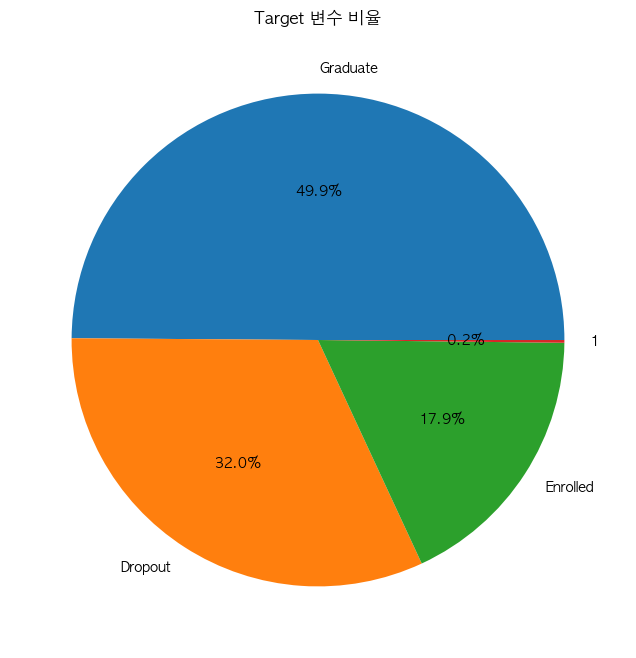

In [40]:
Target = dropout_remove['Target'].value_counts()

plt.pie(Target, labels = Target.index, autopct = '%2.1f%%')
plt.title('Target 변수 비율')
plt.show()

# plotly로 원 그래프 그리기

In [77]:
import plotly.offline
import plotly.express as px
import plotly.graph_objs as go

In [80]:
Target = pd.DataFrame(dropout_remove['Target'].value_counts()).reset_index()
fig = px.pie(data_frame = Target, values = 'Target', names = 'index', title = 'Target 변수 비율')
fig.show()

In [79]:
import seaborn as sns

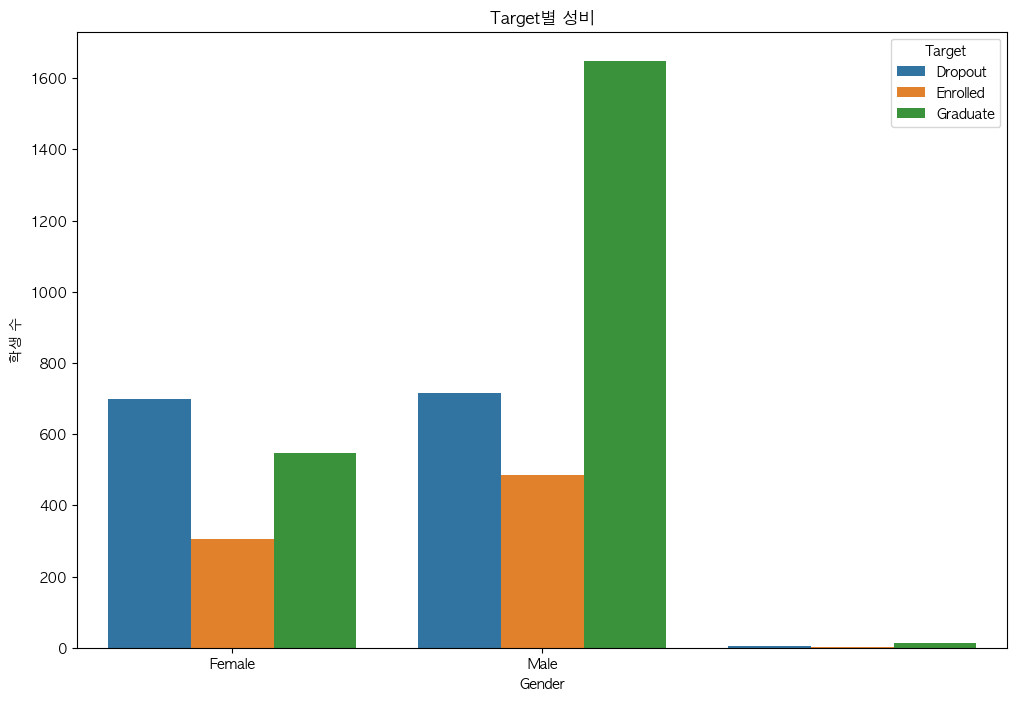

In [44]:
sns.countplot(data = dropout_remove, x = 'Gender', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks = [0, 1], labels = ['Female', 'Male'])
plt.ylabel('학생 수')
plt.title('Target별 성비')
plt.show()

# plotly로 막대그래프 그리기

In [45]:
pivot_df = dropout_remove.groupby(by = ['Gender', 'Target']).count().reset_index()
pivot_df = pivot_df.loc[:, ['Gender','Target', 'ID']]
pivot_df

,Gender,Target,ID
0,1,1,8
1,1,Dropout,4
2,1,Enrolled,2
3,1,Graduate,13
4,Female,Dropout,715
5,Female,Enrolled,484
6,Female,Graduate,1648
7,Male,Dropout,698
8,Male,Enrolled,306
9,Male,Graduate,546


In [46]:
trace1 = go.Bar(x = pivot_df[pivot_df['Target'] == 'Dropout'].Gender,
                y = pivot_df[pivot_df['Target'] == 'Dropout'].ID,
                name = 'Dropout')

trace2 = go.Bar(x = pivot_df[pivot_df['Target'] == 'Enrolled'].Gender,
                y = pivot_df[pivot_df['Target'] == 'Enrolled'].ID,
                name = 'Enrolled')

trace3 = go.Bar(x = pivot_df[pivot_df['Target'] == 'Graduate'].Gender,
                y = pivot_df[pivot_df['Target'] == 'Graduate'].ID,
                name = 'Graduate')

data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Target별 성비')
fig = go.Figure(data = data, layout = layout)
fig.show()

## 결혼 상태에 따른 Target 변수 비율

Text(0.5, 1.0, '결혼 상태에 따른 Target 변수 비율')

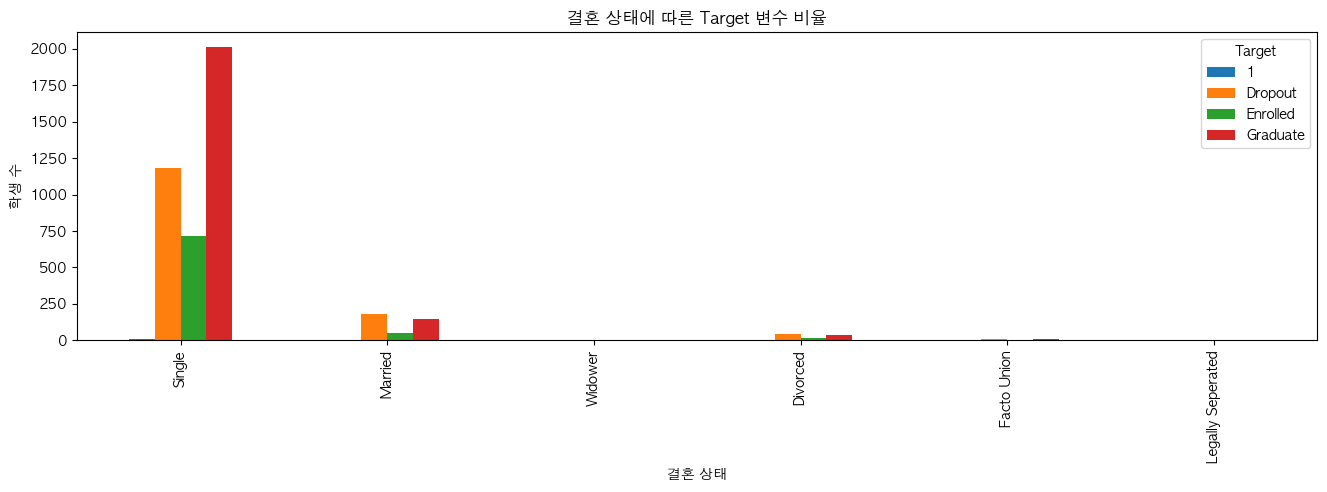

In [47]:
marital_df = pd.crosstab(dropout_remove['Marital status'], dropout_remove['Target'])
marital_df.plot(kind = 'bar', figsize = (16, 4))

plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels = ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])
plt.xlabel('결혼 상태')
plt.ylabel('학생 수')
plt.title("결혼 상태에 따른 Target 변수 비율")

### 결혼 상태에 따른 Target 변수 비율 구하기 -> plotly 라이브러리 사용

In [48]:
def change_matrial_val(values):
    if values == 1:
        return 'Single'
    elif values == 2:
        return 'Married'
    elif values == 3:
        return 'Widower'
    elif values == 4:
        return 'Divorced'
    elif values == 5:
        return 'Facto Union'
    elif values == 6:
        return 'Legally Seperated'

In [49]:
marital_df

Target,1,Dropout,Enrolled,Graduate
Marital status,,,,
1.0,8,1180,718,2013
2.0,0,179,52,148
3.0,0,1,2,1
4.0,0,42,16,33
5.0,0,11,3,11
6.0,0,4,1,1


In [50]:
marital_df = dropout_remove.groupby(by = ['Marital status', 'Target']).count().reset_index()
marital_df = marital_df.loc[:, ['Marital status','Target', 'ID']]
marital_df['Marital_status'] = marital_df['Marital status'].apply(change_matrial_val)

marital_status = marital_df['Marital_status'].unique().tolist()
print(marital_status)

trace1 = go.Bar(x = marital_df[marital_df['Target'] == 'Dropout'].Marital_status,
               y = marital_df[marital_df['Target'] == 'Dropout'].ID.tolist(), name = 'Single')

trace2 = go.Bar(x = marital_df[marital_df['Target'] == 'Enrolled'].Marital_status,
               y = marital_df[marital_df['Target'] == 'Enrolled'].ID.tolist(), name = 'Married')

trace3 = go.Bar(x = marital_df[marital_df['Target'] == 'Graduate'].Marital_status,
               y = marital_df[marital_df['Target'] == 'Graduate'].ID.tolist(), name = 'Widower')


data = [trace1, trace2, trace3]
layout = go.Layout(barmode = 'group', title = '결혼 상태별 Target 비율')
fig = go.Figure(data = data, layout = layout)
fig.show()

['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated']


## 전공?에 따른 Target 비율

In [51]:
course_remove = dropout_remove.groupby(by = ['Course', 'Target']).size().reset_index().pivot(columns = 'Target',
                                                                                             index = 'Course',
                                                                                             values = 0)


course_remove = course_remove.rename(index={
    1:'Biofuel Production Technologies',
    2:'Animation and Multimedia Design',
    3:'Social Service (Evening Attendance)',
    4:'Agronomy',5:'Communication Design',
    6:'Veterinary Nursing',
    7:'Informatics Engineering',
    8:'Equiniculture',
    9:'Management',
    10:'Social Service',
    11:'Tourism',
    12:'Nursing',
    13:'Oral Hygiene',
    14:'Advertising and Marketing Management',
    15:'Journalism and Communication',
    16:'Basic Education',
    17:'Management (Evening Attendance)'})

In [52]:
# 열을 기준으로 각 범주별 총합 계산
course_remove_total = course_remove.sum(axis = 1)

# 총합을 기준으로 오름차순 정렬
course_remove_sorted = course_remove_total.sort_values(ascending = True)

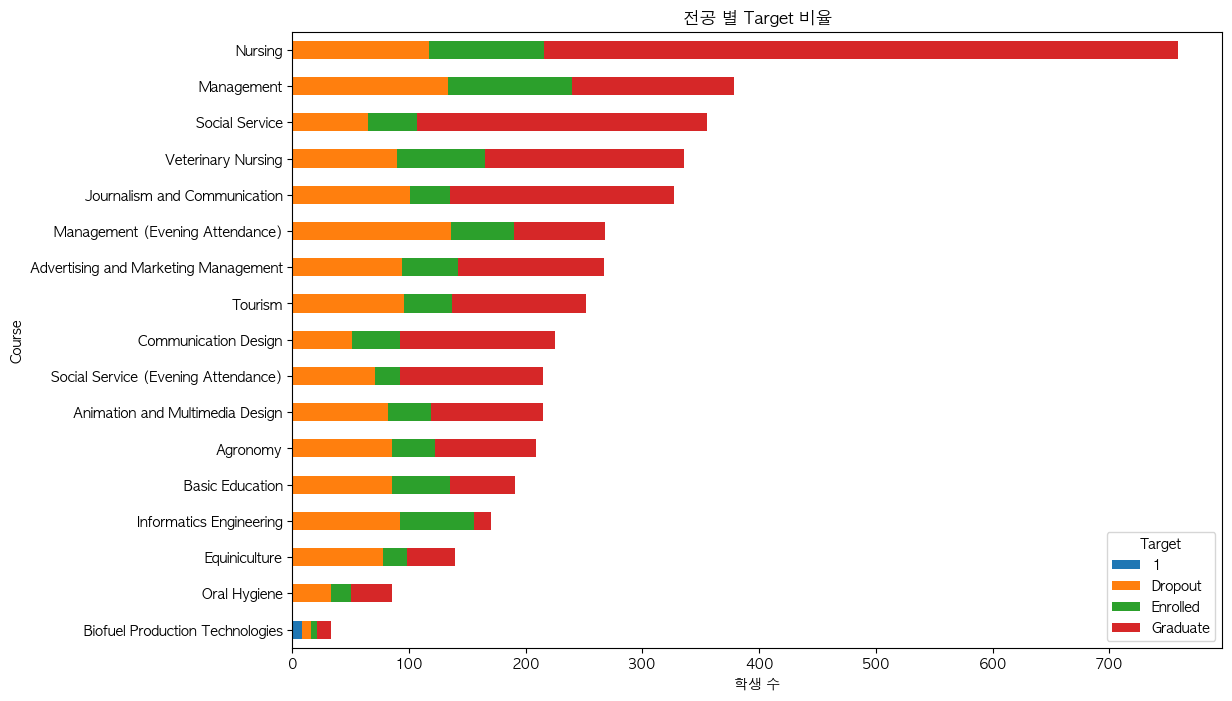

In [53]:
course_remove.loc[course_remove_sorted.index].plot(kind = 'barh', stacked = True)
plt.title('전공 별 Target 비율')
plt.xlabel('학생 수')
plt.show()

### 전공에 따른 Target 비율 -> plotly 라이브러리 사용

In [54]:
course_df = dropout_remove.groupby(by = ['Course', 'Target']).size().reset_index().rename(columns = {0 : 'ID'})
course_df = course_df.loc[:, ['Course', 'Target', 'ID']]

In [55]:
name_list = ['Biofuel Production Technologies',
    'Animation and Multimedia Design',
    'Social Service (Evening Attendance)',
    'Agronomy',
    'Communication Design',
    'Veterinary Nursing',
    'Informatics Engineering',
    'Equiniculture',
    'Management',
    'Social Service',
    'Tourism',
    'Nursing',
    'Oral Hygiene',
    'Advertising and Marketing Management',
    'Journalism and Communication',
    'Basic Education',
    'Management (Evening Attendance)']

In [56]:
def change_course_val(values):
    for idx in range(2, 18):
        if values == 1:
            return 'Biofuel Production Technologies'
        elif values == idx:
            return name_list[idx-1]

In [57]:
course_df['Course'] = course_df['Course'].apply(change_course_val)

In [58]:
fig = px.bar(course_df, x = 'Course', y = 'ID', color = 'Target')
fig.show()

### 국적에 따른 Target 비율

- 포르투칼인이 압도적으로 많아 예측률에 큰 영향은 못 줄 것으로 보임

In [59]:
nation_df = dropout_remove.groupby(by = ['Nationality', 'Target']).size().reset_index().pivot(columns = 'Target',
                                                                                              index = 'Nationality',
                                                                                              values = 0)

ValueError: Grouper for 'Nationality' not 1-dimensional

In [60]:
nation_df = nation_df.rename(index={1:'Portuguese',
                                    2:'German',
                                    3:'Spanish',
                                    4:'Italian',
                                    5:'Dutch',
                                    6:'English',
                                    7:'Lithuanian',
                                    8:'Angolan',
                                    9:'Cape Verdean',
                                    10:'Guinean',
                                    11:'Mozambican',
                                    12:'Santomean',
                                    13:'Turkish',
                                    14:'Brazilian',
                                    15:'Romanian',
                                    16:'Moldova',
                                    17:'Mexican',
                                    18:'Ukrainian',
                                    19:'Russian',
                                    20:'Cuban', 
                                    21:'Colombian'})

NameError: name 'nation_df' is not defined

In [61]:
nation_df_sum = nation_df.sum(axis = 1)
nation_df_sorted = nation_df_sum.sort_values(ascending = True)
nation_df.loc[nation_df_sorted.index].plot(kind = 'barh', stacked = True)

plt.title('국적에 따른 학생 수 (Target 비율)')
plt.xlabel("학생 수")
plt.ylabel('국적')
plt.show()

NameError: name 'nation_df' is not defined

### 국적에 따른 Target 비율 -> plotly 라이브러리 사용

In [62]:
nation_df = dropout_remove.groupby(by = ['Nationality', 'Target']).size().reset_index().rename(columns = {0 : 'count'})
nation_df.head()

ValueError: Grouper for 'Nationality' not 1-dimensional

In [63]:
nation_df = nation_df.sort_values(by = 'count', ascending = False)

NameError: name 'nation_df' is not defined

In [64]:
fig = px.bar(nation_df, x = 'Nationality', y = 'count', color = 'Target', title = "국적별 학생 수 (Target 비율)")
fig.show()

NameError: name 'nation_df' is not defined

## 연령대 분포도 그리기

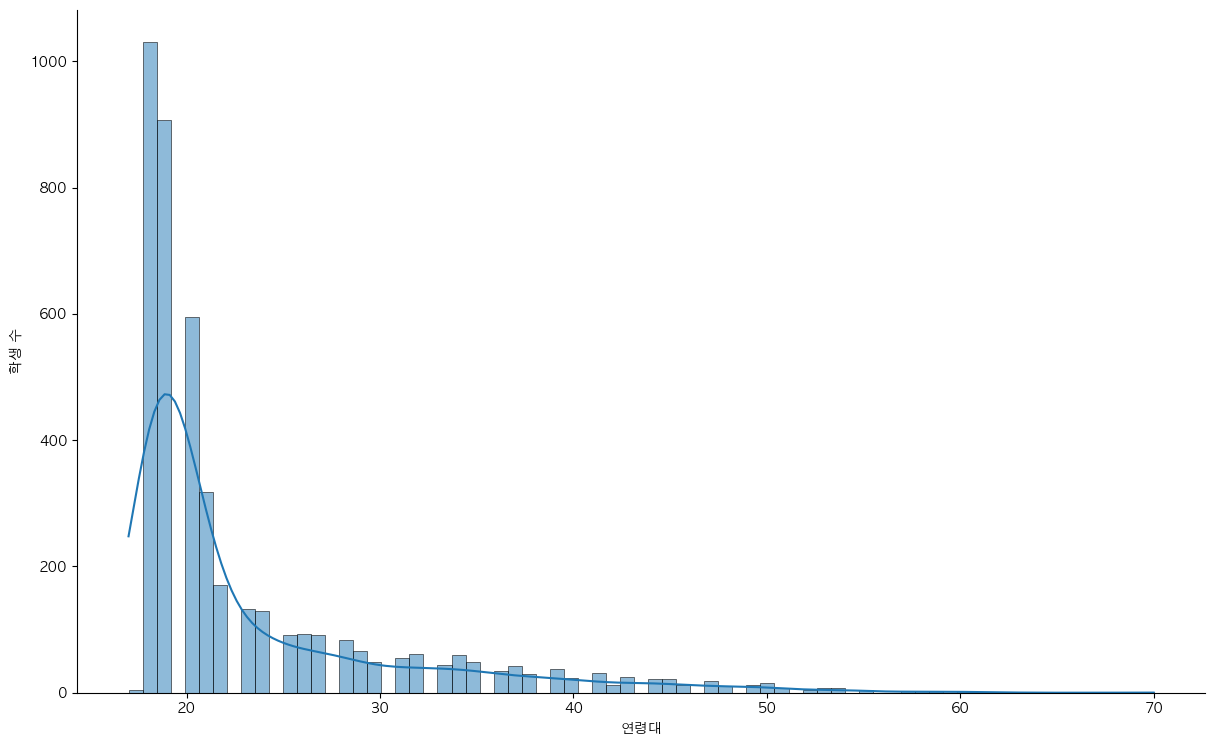

In [65]:
fig = sns.displot(data = dropout_remove, x = 'Age at enrollment', kde = True)
fig.fig.set_size_inches(14, 8)
plt.xlabel('연령대')
plt.ylabel('학생 수')
plt.show()

### 연령대 분포도 그리기 -> plotly 라이브러리 사용

In [66]:
import plotly.figure_factory as ff

In [67]:
student_cnt = dropout_remove.groupby(by = ['Age at enrollment']).size().reset_index().rename(columns = {0 : 'count'}).astype({'Age at enrollment' : 'object'})

In [68]:
fig = px.histogram(student_cnt, x = 'Age at enrollment',
                                y = 'count',
                                marginal = 'box', nbins = 50)
# 간격 계산
fig.update_layout(bargap = 0.2)
fig.show()

# ------------------------------------------------------------------------------------------------------------

# 히트맵 그리기 -> 변수 선택

In [69]:
# 인구통계학 데이터

demo_data = dropout_remove[["Marital status", "Nationality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# 사회-경제 데이터
se_data = dropout_remove[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# 미시경제 데이터
me_data = dropout_remove[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# 학업 데이터
academic_data = dropout_remove[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

### 인구통계학 데이터 히트맵

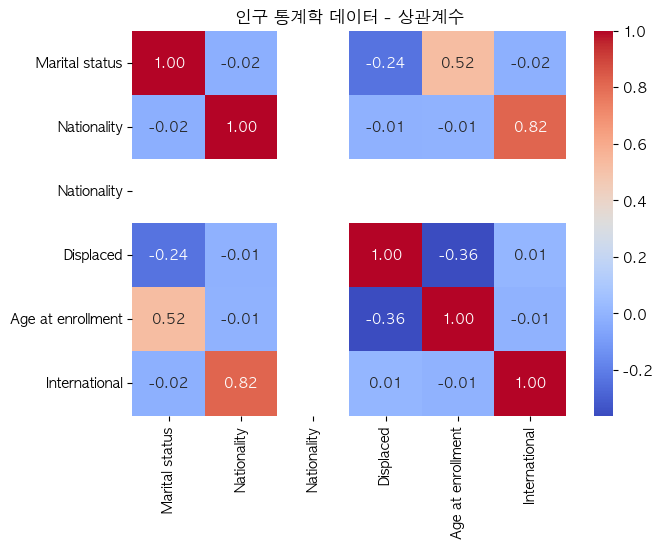

In [70]:
plt.figure(figsize = (7, 5))
sns.heatmap(demo_data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('인구 통계학 데이터 - 상관계수')
plt.show()

### 사회-경제 데이터 히트맵

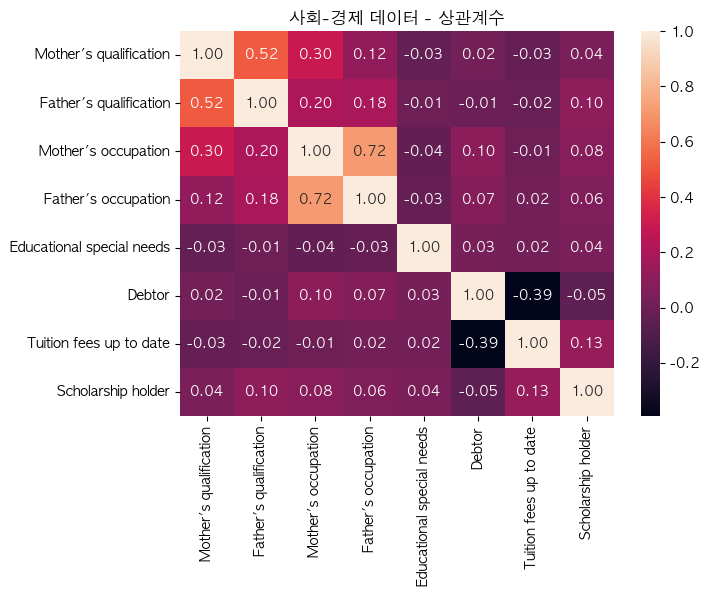

In [71]:
plt.figure(figsize = (7, 5))
sns.heatmap(se_data.corr(), annot = True, fmt = '.2f')
plt.title('사회-경제 데이터 - 상관계수')
plt.show()

### 미시경제 데이터 히트맵

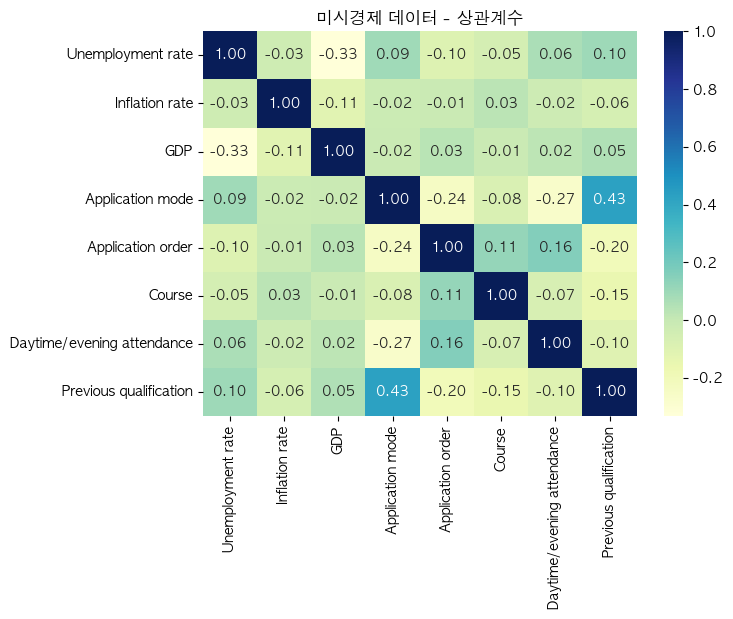

In [72]:
plt.figure(figsize = (7, 5))
sns.heatmap(me_data.corr(), annot = True, cmap = 'YlGnBu', fmt = '.2f')
plt.title('미시경제 데이터 - 상관계수')
plt.show()

### 학업 데이터 히트맵

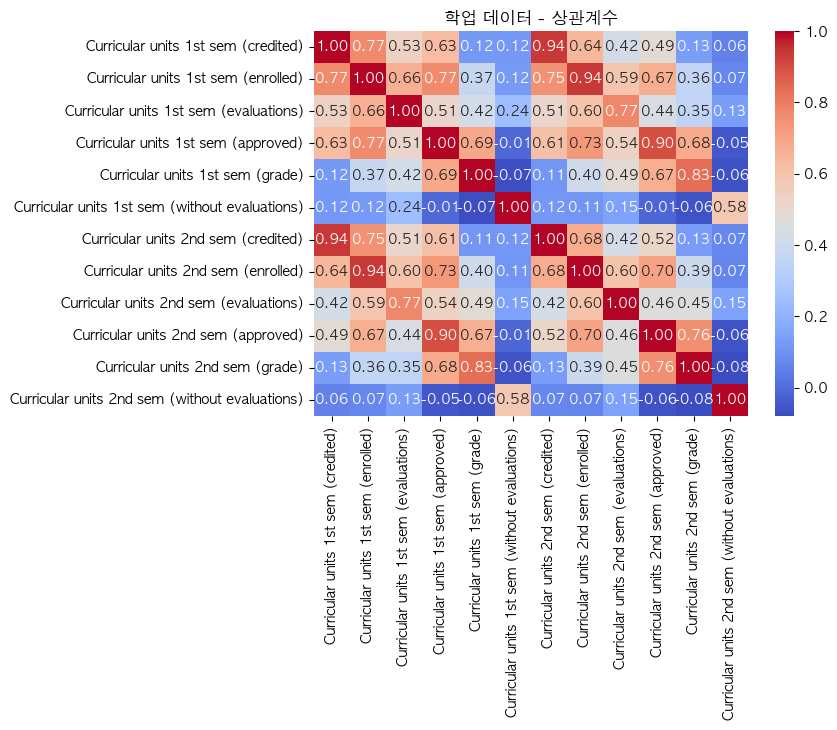

In [73]:
plt.figure(figsize = (7, 5))
sns.heatmap(academic_data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('학업 데이터 - 상관계수')
plt.show()

# 변수 선택

- 중복성 제거와 과적합 방지를 위해 유사한 상관계수를 가진 변수들 제거

In [74]:
# 삭제 필요한 컬럼 리스트
need_to_remove_col = ["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"]

need_to_remove_col.extend(['Nationality'])

In [75]:
dropout_remove.drop(need_to_remove_col, axis = 1, inplace = True)

In [76]:
dropout_remove['Target'].value_counts()

Graduate    2207
Dropout     1417
Enrolled     792
1              8
Name: Target, dtype: int64

# -------------------------------------------------------------------------------------------------------------

# 데이터 처리

1. 컬럼별 타입 확인
- 문자형, 수치형 확인

2. 컬럼별 결측치 확인
- 컬럼별 결측치 비율 확인 후 제거 판별

3. 결측치 대체 방법 확인
- 문자형(빈도) / 수치형(평균, 최대/최소값, 최빈값 등)

4. 결측치 대치 후 최종 확인
- 결측치 유무 확인

5. 변수 선택
- 상관분석 등 기타 분석을 통해 변수 선택 및 제거 진행

6. 최종 데이터 확인
- 모델 학습 및 테스트를 위한 최종 데이터 확인